In [1]:
import glob
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
print(os.getcwd())

data_folder = "/Users/jiang/data/rain_kakuho"
grib_files = glob.glob(os.path.join(data_folder,"*.000"))  # 288 = 12*24
grib_files.sort()

/Users/jiang/github_all/rainymotion/docs/notebooks


In [2]:
grib_files

['/Users/jiang/data/rain_kakuho/20200108_082000.000',
 '/Users/jiang/data/rain_kakuho/20200108_082500.000']

### read wgrib2 file into nc file

In [6]:
varlist = [":{} min".format(i) for i in range(5,185,5)]  # create a varaible list from 5 to 180 min
var = '|'.join(varlist)
for grib_file in grib_files:
    cmd = "wgrib2 {0} -s | egrep '({1})'|wgrib2 -i {0} -netcdf {2}".format(grib_file, var, grib_file +".nc")
    fail = os.system(cmd)  # 0 indicate success, others indicate fail
    if fail:
        print("wgrib2 wrong at ", grib_file)

In [22]:
from netCDF4 import Dataset
nc_file = grib_files[0] +".nc"
root = Dataset(nc_file, "r")

from datetime import datetime,timedelta
dt = datetime(1970, 1, 1) + timedelta(seconds = root['time'][0].compressed()[0])
date_string = dt.strftime('%Y-%m-%d %H:%M UTC ')
print(date_string)

2020-01-08 08:25 UTC 


In [23]:
root

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_CLASSIC data model, file format NETCDF3):
    Conventions: COARDS
    History: created by wgrib2
    GRIB2_grid_template: 0
    dimensions(sizes): latitude(3360), longitude(2560), time(36)
    variables(dimensions): float64 latitude(latitude), float64 longitude(longitude), float64 time(time), float32 APCP_surface(time,latitude,longitude)
    groups: 

In [24]:
root['APCP_surface'].shape  # shape (36, 3360, 2560)
rain = root['APCP_surface'][0,:,:]
rain_reduced = rain[1500:2500,1000:2000].copy()
rain_reduced.fill_value = 0.0
rain_filled = rain_reduced.filled().astype('float16')

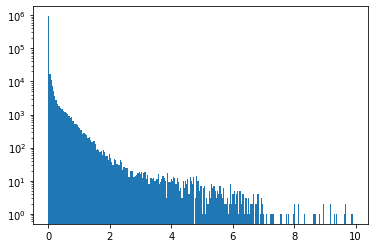

In [21]:
plt.hist(rain_filled.ravel(),256)
plt.yscale('log')